# PHYS 267 - Assignment 9
###### Last Updated: March 13, 2023 by Dr. Brenda Lee
***

### Question 1

A volcano called Lassen Peak erupted in 1915. The products of the eruption were recorded, called A (sodium oxide) and B (silicon dioxide). The percent composition values are given below:

<table>
    <tr>
        <th scope="row">A (Sodium Oxide)</th>
        <td>3.75</td>
        <td>3.64</td>
        <td>3.91</td>
        <td>3.72</td>
        <td>3.97</td>
        <td>4.06</td>
        <td>4.05</td>
        <td>4.03</td>
        <td>3.98</td>
        <td>4.01</td>
        <td>3.94</td>
        <td>3.95</td>
        <td>3.99</td>
        <td>4.12</td>
        <td>4.19</td>
        <td>4.07</td>
        <td>4.12</td>
        <td>4.11</td>
        <td>4.01</td>
        <td>4.03</td>
        <td>4.25</td>
    </tr>
    <tr>
        <th scope="row">B (Silicon Dioxide)</th>
        <td>57.0</td>
        <td>58.7</td>
        <td>59.1</td>
        <td>59.4</td>
        <td>59.7</td>
        <td>60.5</td>
        <td>61.5</td>
        <td>63.0</td>
        <td>63.5</td>
        <td>64.1</td>
        <td>64.2</td>
        <td>64.3</td>
        <td>64.4</td>
        <td>64.5</td>
        <td>64.7</td>
        <td>64.9</td>
        <td>65.0</td>
        <td>65.8</td>
        <td>66.1</td>
        <td>66.9</td>
        <td>69.5</td>
    </tr>
</table>

1. [2 marks] Plot these data points as a scatterplot and label it well.
2. [2 marks] After a visual inspection, explain what degree of polynomial curve you would use to model this. 
3. [6 marks] Use Python code to find the best-fit parameters for your model and report the $R^2$ value. Comment on how related these two values are.

Total Marks: 10

#### Solution

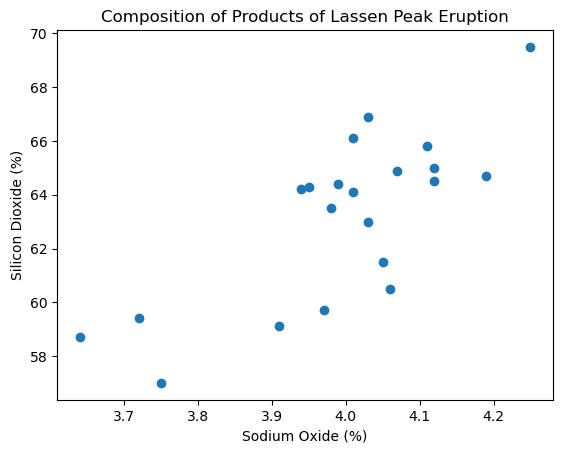

In [1]:
# Part 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data points
A = np.array([3.75, 3.64, 3.91, 3.72, 3.97, 4.06, 4.05, 4.03, 3.98, 4.01, 3.94, 3.95, 3.99, 4.12, 4.19, 4.07, 4.12, 4.11, 4.01, 4.03, 4.25])
B = np.array([57.0, 58.7, 59.1, 59.4, 59.7, 60.5, 61.5, 63.0, 63.5, 64.1, 64.2, 64.3, 64.4, 64.5, 64.7, 64.9, 65.0, 65.8, 66.1, 66.9, 69.5])

# Plot the scatterplot
plt.scatter(A, B)
plt.xlabel("Sodium Oxide (%)")
plt.ylabel("Silicon Dioxide (%)")
plt.title("Composition of Products of Lassen Peak Eruption")
plt.show()


# Part 2

It appears to be quadratic in nature, since somewhat of a curve canbe seen


R-squared value: 0.5943523942032469


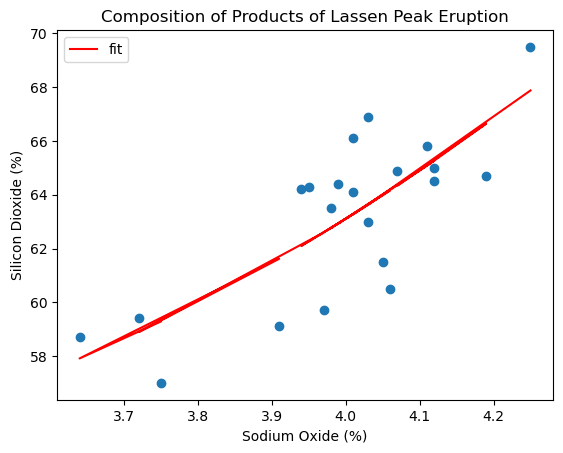

In [3]:
# Part 3

# Define the function to fit the data
def func(x, a, b, c):
    return a + b*x + c*x**2

# Fit the data
popt, pcov = curve_fit(func, A, B)

# Calculate R^2 value
residuals = B - func(A, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((B - np.mean(B))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)

# Plot the best-fit curve
plt.scatter(A, B)
plt.plot(A, func(A, *popt), 'r-', label='fit')
plt.xlabel("Sodium Oxide (%)")
plt.ylabel("Silicon Dioxide (%)")
plt.title("Composition of Products of Lassen Peak Eruption")
plt.legend()
plt.show()

### Question 2

An asteroid is heading for Earth! Or...is it an asteroid? Measurements were taken over a period of time to record the velocity of the object as it approached Earth in light-days. The dataset is available as A9_Q2.txt.

1. [3 marks] Plot these data points as a scatterplot and label it well. Make sure you plot the error as well, which is present as +/- values.
2. [3 marks] After a visual inspection, explain what degree of polynomial curve you would use to model this and present a possible model with parameters.
3. [12 marks] Use Python code and (optionally, a for loop for optimization of code) to find the best degree fit and for that fit, the best parameters for your model up to $R^2 = 0.98$ and report the $R^2$ value for each loop.
4. [2 marks] Do you think this is an asteroid or not? Explain for full marks.

Total Marks: 20

#### Solution

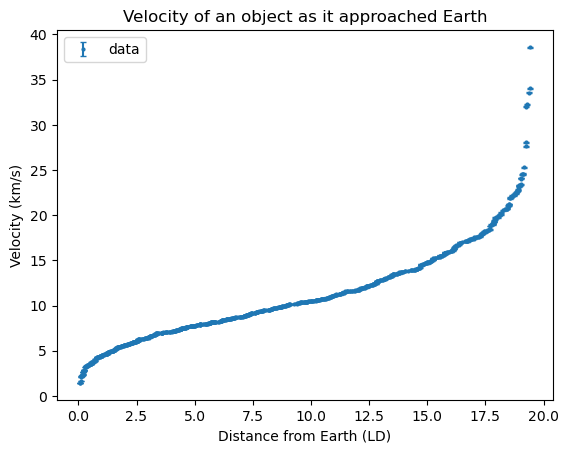

In [5]:
# Part 1
import numpy as np, matplotlib.pyplot as plt

# load the dataset
data = np.loadtxt('A9_Q2.txt', skiprows=1)

# extract the data
x = data[:,0]
y = data[:,2]
error = data[:,1]

# plot the data
plt.errorbar(x, y, yerr=error, fmt='o', markersize=2, capsize=2, label='data')
plt.xlabel('Distance from Earth (LD)')
plt.ylabel('Velocity (km/s)')
plt.title('Velocity of an object as it approached Earth')
plt.legend()
plt.show()



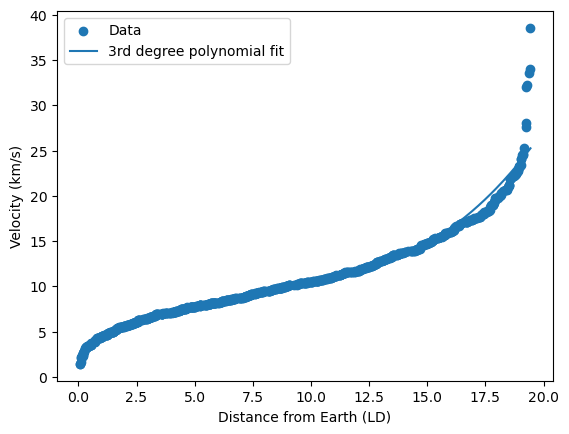

d = 0.007549679045433054
c = -0.18035276316208143
b = 1.8243323912949343
a = 2.4943290955782227


In [9]:
# Part 2
# Visually a 3rd degree polynomial would fit this graph, the form would look like 
# y = ax^3+bx^2+cx+d
# where a, b, c, and d are the coefficients

# Fit a 3rd degree polynomial curve to the data
p = np.polyfit(x, y, 3)
y_fit = np.polyval(p, x)

# Plot the original data and the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, label='3rd degree polynomial fit')
plt.xlabel('Distance from Earth (LD)')
plt.ylabel('Velocity (km/s)')
plt.legend()
plt.show()

# Print the parameters of the fitted curve
print('d =', p[0])
print('c =', p[1])
print('b =', p[2])
print('a =', p[3])

Degree 1 R^2: 0.8917
Degree 2 R^2: 0.9279
Degree 3 R^2: 0.9697
Degree 4 R^2: 0.9729
Degree 5 R^2: 0.9812


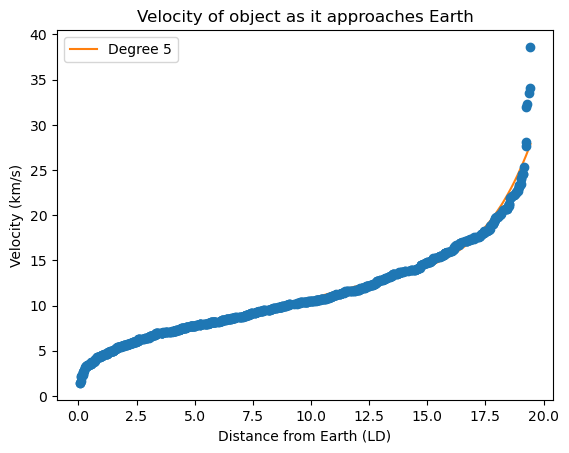

Best fit: Degree 5 with coefficients [ 1.41098114e-04 -6.32931959e-03  1.05751166e-01 -7.95780479e-01
  3.18992080e+00  1.87739339e+00]


In [6]:
# Part 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# try polynomial curves of increasing degree until we find one with R^2 >= 0.98
r2 = 0
degree = 0
while r2 < 0.98:
    degree += 1
    coeffs = np.polyfit(distance, velocity, degree)
    fit = np.polyval(coeffs, distance)
    r2 = r2_score(velocity, fit)
    print(f"Degree {degree} R^2: {r2:.4f}")

# plot data and fitted curve
plt.errorbar(distance, velocity, yerr=error, fmt="o", capsize=3)
plt.plot(distance, fit, label=f"Degree {degree}")
plt.xlabel("Distance from Earth (LD)")
plt.ylabel("Velocity (km/s)")
plt.title("Velocity of object as it approaches Earth")
plt.legend()
plt.show()

print(f"Best fit: Degree {degree} with coefficients {coeffs}")


# Part 4
It's difficult to say since  we don't know other information like mass. But 20km/s is typically the speeds of asteroids, so it could be an asteroid. But it could also be a spacecraft. Since speed would decrease closer to earth but be higher in outer orbits or to escape earth.